# <-- Task 20 -->

In [45]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
(X_train , y_train), (X_test , y_test) = keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 3s 0us/step


In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


5
7


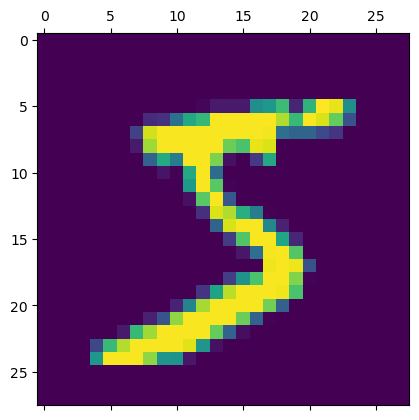

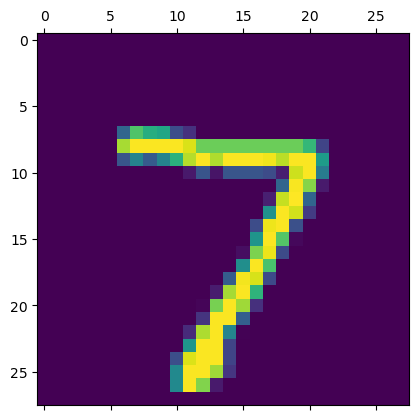

In [16]:
plt.matshow(X_train[0])
print(y_train[0])
print(y_test[0])
plt.matshow(X_test[0])

In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [25]:
X_train_flattened.shape

(60000, 784)

In [29]:
model = keras.Sequential(
    [keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')]
)
model.compile( optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8774
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.9151
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.9205


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2732 - accuracy: 0.9243


[0.27319321036338806, 0.9243000149726868]

In [32]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [37]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted_labels)


array([[ 965,    0,    2,    1,    0,    3,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   10,  933,   15,    8,    3,    9,   10,   32,    5],
       [   3,    1,   24,  923,    0,   20,    2,    9,   19,    9],
       [   2,    2,    7,    1,  903,    0,    9,    2,    7,   49],
       [  10,    3,    5,   36,    8,  767,   16,    7,   32,    8],
       [  15,    3,    9,    1,    8,   10,  908,    2,    2,    0],
       [   1,    8,   24,    8,    5,    0,    0,  938,    3,   41],
       [   8,   11,   10,   22,    9,   25,    9,   12,  855,   13],
       [  12,    7,    1,   11,   21,    5,    0,   14,    5,  933]],
      dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

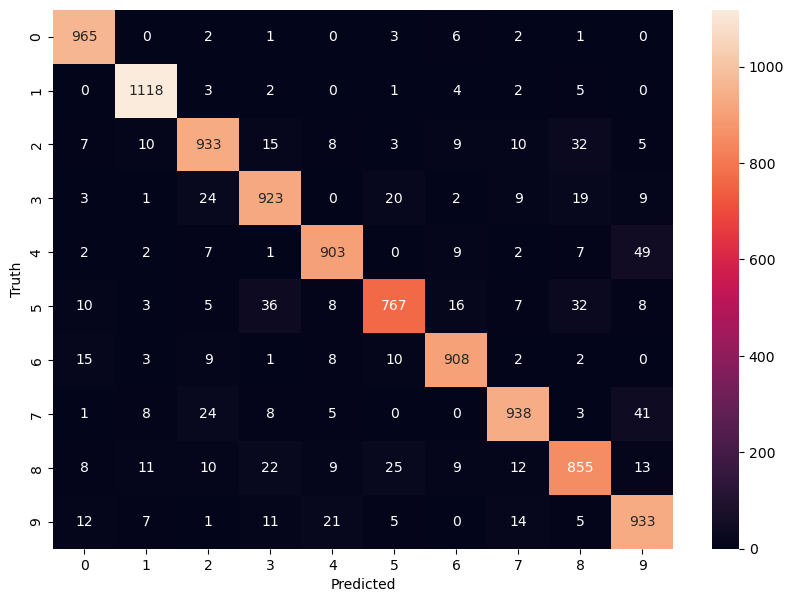

In [48]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')